In [1]:
import tensorflow as tf
print(tf.__version__)  # TensorFlow 버전 확인
print("CUDA Available: ", tf.test.is_built_with_cuda())  # CUDA 사용 가능 여부 확인
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2024-12-30 06:18:17.462611: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-30 06:18:17.462691: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-30 06:18:17.462743: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.14.0
CUDA Available:  True
Num GPUs Available:  1


In [2]:
# 한글 폰트 깨짐 문제 해결
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager

# NanumGothic 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 폰트 설정
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

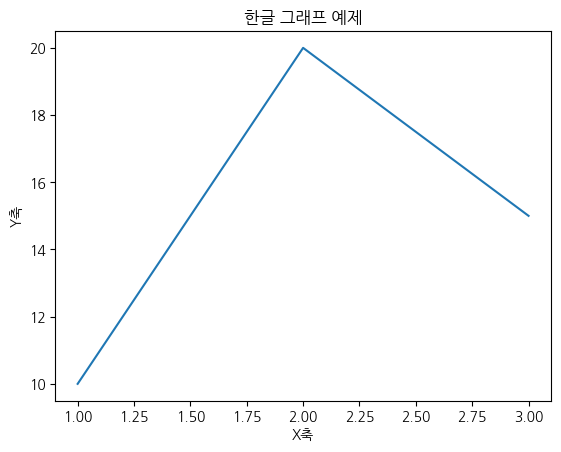

In [3]:
# 예제 그래프
plt.plot([1, 2, 3], [10, 20, 15])
plt.title('한글 그래프 예제')
plt.xlabel('X축')
plt.ylabel('Y축')
# plt.savefig("/workspace/uk/nanum_graph.png", dpi=300, bbox_inches='tight')
plt.show()

#### YOLO 모델
- yolo_v8 모델에 클래스 라벨을 감정으로 설정해서 학습
- 데이터 구성 다르게 학습해서 (테스트 데이터로) 성능 지표 확인
- 가장 성능 좋은 데이터 구성 선택 -> Hyperparameter 최적화

In [1]:
import os
import pandas as pd
import torch
from ultralytics import YOLO

In [2]:
# 원본 데이터
yaml_path = '/workspace/uk/yolo/yolo_all_data/yolo_all_data.yaml'     
folder_path = '/workspace/uk/yolo/SGD_32_0.01'                          # 저장 경로 (훈련 시마다 수정)
train_folder_name = 'train'                            
test_folder_name = 'test'


In [3]:
# 하이퍼파라미터

# 옵티마이저 ('SGD', 'Adam')
optimizer = 'SGD'

# 배치 크기 (16, 32, 64)
batch_size = 32

# 초기 학습률 (0.01, 0.005, 0.001)
lr_0 = 0.01

In [4]:
# YOLO 모델 로드 (YOLOv8n)
model = YOLO('yolov8n.pt')  # 미리 훈련된 YOLOv8 모델

In [5]:
# 훈련 시작
model.train(
    data=yaml_path,             # 데이터 설정 파일 (훈련용)
    epochs=300,                 # 훈련 에포크 수
    patience=10,                # Early-Stopping 조건
    batch=batch_size,           # 배치 사이즈
    lr0=lr_0,                   # 더 작은 초기 학습률
    optimizer=optimizer,        # 옵티마이저
    imgsz=640,                  # 이미지 사이즈
    project=folder_path,        # 결과 저장 경로
    name=train_folder_name,     # 폴더 이름
    save=True,                  # 모델 저장 여부
    save_period=10,             # N 에포크마다 체크포인트 저장
    verbose=True,               # 학습 상태 출력
    device='0',                 # GPU 사용
    workers = 4
)

Ultralytics 8.3.55 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16001MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/workspace/uk/yolo/yolo_all_data/yolo_all_data.yaml, epochs=300, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=10, cache=False, device=0, workers=4, project=/workspace/uk/yolo/SGD_32_0.01, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torc

[W1230 06:27:30.192626538 NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


Model summary: 225 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir /workspace/uk/yolo/SGD_32_0.01/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /workspace/data_for_yolo/Albumentation.cache... 23972 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23972/23972 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.23). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /workspace/data_for_yolo/val.cache... 1199 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1199/1199 [00:00<?, ?it/s]


Plotting labels to /workspace/uk/yolo/SGD_32_0.01/train/labels.jpg... 


/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/plotting.py:954: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/plotting.py:954: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/plotting.py:954: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/plotting.py:954: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/plotting.py:954: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}) missing from 

optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /workspace/uk/yolo/SGD_32_0.01/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      4.29G     0.7138      1.741      1.087         10        640: 100%|██████████| 750/750 [02:34<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.62it/s]

                   all       1199       1199      0.687       0.76      0.779      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      4.29G     0.6827      1.048      1.039         11        640: 100%|██████████| 750/750 [02:29<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]

                   all       1199       1199      0.729      0.756      0.833      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      4.29G     0.7038      1.005      1.044          5        640: 100%|██████████| 750/750 [02:21<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.72it/s]

                   all       1199       1199      0.755      0.764       0.84      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      4.29G     0.6993     0.9813      1.044          6        640: 100%|██████████| 750/750 [02:21<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all       1199       1199      0.741      0.766      0.836      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      4.29G     0.6554     0.9049      1.025          5        640: 100%|██████████| 750/750 [02:21<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all       1199       1199       0.72      0.832      0.853       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      4.29G     0.6274     0.8496      1.011          7        640: 100%|██████████| 750/750 [02:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.73it/s]

                   all       1199       1199      0.834      0.778       0.88       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      4.29G     0.6108      0.826      1.006          6        640: 100%|██████████| 750/750 [02:21<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all       1199       1199      0.766      0.829      0.875      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300       4.3G     0.5978      0.798      1.001         13        640: 100%|██████████| 750/750 [02:21<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all       1199       1199      0.832      0.803      0.879      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300       4.3G     0.5846     0.7741     0.9944          4        640: 100%|██████████| 750/750 [02:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all       1199       1199      0.844      0.796      0.896      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300       4.3G     0.5796     0.7636     0.9932          9        640: 100%|██████████| 750/750 [02:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.67it/s]

                   all       1199       1199       0.83       0.82      0.902      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300       4.3G     0.5702     0.7451     0.9887         12        640: 100%|██████████| 750/750 [02:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all       1199       1199      0.856      0.821      0.908      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300       4.3G     0.5617     0.7383     0.9854          7        640: 100%|██████████| 750/750 [02:20<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all       1199       1199       0.83      0.833      0.901      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300       4.3G     0.5579     0.7251     0.9822          6        640: 100%|██████████| 750/750 [02:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.69it/s]

                   all       1199       1199      0.833      0.816      0.905      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300       4.3G     0.5555     0.7144     0.9818         10        640: 100%|██████████| 750/750 [02:20<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all       1199       1199      0.848      0.828       0.91      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300       4.3G     0.5496     0.7068     0.9794          6        640: 100%|██████████| 750/750 [02:26<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all       1199       1199      0.809       0.86      0.916      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300       4.3G     0.5492     0.7028     0.9795          9        640: 100%|██████████| 750/750 [02:21<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.65it/s]

                   all       1199       1199      0.823      0.833      0.905       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300       4.3G     0.5407     0.6913     0.9756          6        640: 100%|██████████| 750/750 [02:21<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all       1199       1199       0.85      0.827      0.911      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300       4.3G      0.542     0.6821     0.9752          8        640: 100%|██████████| 750/750 [02:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]

                   all       1199       1199      0.827      0.852      0.912      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300       4.3G     0.5379     0.6794     0.9753         12        640: 100%|██████████| 750/750 [02:24<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all       1199       1199      0.829      0.863      0.913      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300       4.3G     0.5325     0.6722     0.9722          9        640: 100%|██████████| 750/750 [02:21<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all       1199       1199      0.885      0.817      0.917      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300       4.3G     0.5321     0.6688     0.9723         10        640: 100%|██████████| 750/750 [02:21<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.73it/s]

                   all       1199       1199      0.862      0.829      0.914      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300       4.3G     0.5295      0.658     0.9713          6        640: 100%|██████████| 750/750 [02:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all       1199       1199      0.873      0.822      0.916      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300       4.3G      0.528      0.658     0.9706          6        640: 100%|██████████| 750/750 [02:20<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.72it/s]

                   all       1199       1199      0.883      0.819       0.92      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300       4.3G     0.5292     0.6552     0.9721          9        640: 100%|██████████| 750/750 [02:20<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all       1199       1199      0.885      0.804      0.915      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300       4.3G     0.5229     0.6493     0.9705          8        640: 100%|██████████| 750/750 [02:20<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.73it/s]

                   all       1199       1199      0.871      0.835      0.921      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300       4.3G     0.5232     0.6489     0.9679          9        640: 100%|██████████| 750/750 [02:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.72it/s]

                   all       1199       1199      0.863      0.847       0.92      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300       4.3G     0.5202     0.6382     0.9658         11        640: 100%|██████████| 750/750 [02:22<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all       1199       1199      0.858       0.84      0.918      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300       4.3G     0.5212     0.6406     0.9675          8        640: 100%|██████████| 750/750 [02:21<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.62it/s]

                   all       1199       1199      0.881      0.832      0.917      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300       4.3G     0.5184     0.6348     0.9638          9        640: 100%|██████████| 750/750 [02:21<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.72it/s]

                   all       1199       1199      0.839      0.859      0.914      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300       4.3G     0.5174     0.6265     0.9658         10        640: 100%|██████████| 750/750 [02:21<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.71it/s]

                   all       1199       1199      0.859      0.846      0.917       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300       4.3G      0.517     0.6291     0.9641          9        640: 100%|██████████| 750/750 [02:20<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all       1199       1199      0.863      0.848      0.914      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300       4.3G     0.5114     0.6269      0.962         12        640: 100%|██████████| 750/750 [02:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all       1199       1199      0.873      0.845      0.918       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300       4.3G     0.5098     0.6227     0.9645          7        640: 100%|██████████| 750/750 [02:21<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.70it/s]

                   all       1199       1199       0.87      0.847      0.918      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300       4.3G     0.5093     0.6204     0.9619         12        640: 100%|██████████| 750/750 [02:21<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.73it/s]

                   all       1199       1199       0.88      0.841      0.919      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300       4.3G     0.5093      0.611     0.9621          9        640: 100%|██████████| 750/750 [02:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all       1199       1199      0.857      0.863      0.917      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300       4.3G     0.5091     0.6129     0.9612         12        640: 100%|██████████| 750/750 [02:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.76it/s]

                   all       1199       1199       0.86      0.852      0.915      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300       4.3G     0.5144     0.6099     0.9649          6        640: 100%|██████████| 750/750 [02:21<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all       1199       1199      0.852      0.852      0.915      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300       4.3G     0.5096     0.6088     0.9632         13        640: 100%|██████████| 750/750 [02:21<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all       1199       1199      0.853      0.847      0.915      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300       4.3G     0.5083     0.6015     0.9619          6        640: 100%|██████████| 750/750 [02:22<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all       1199       1199      0.878      0.826      0.914      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300       4.3G     0.5069     0.6024       0.96         13        640: 100%|██████████| 750/750 [02:21<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.76it/s]

                   all       1199       1199      0.873      0.834      0.913      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300       4.3G     0.5052     0.5994     0.9609          8        640: 100%|██████████| 750/750 [02:21<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.74it/s]

                   all       1199       1199       0.87      0.837      0.913      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300       4.3G      0.508     0.6013     0.9618          6        640: 100%|██████████| 750/750 [02:21<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all       1199       1199      0.878      0.837      0.913      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300       4.3G     0.5062     0.5975     0.9618          6        640: 100%|██████████| 750/750 [02:21<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.78it/s]

                   all       1199       1199      0.875      0.835      0.913      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300       4.3G        0.5     0.5901     0.9575         10        640: 100%|██████████| 750/750 [02:21<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.75it/s]

                   all       1199       1199      0.872      0.839      0.914      0.848
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 34, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



44 epochs completed in 1.832 hours.
Optimizer stripped from /workspace/uk/yolo/SGD_32_0.01/train/weights/last.pt, 6.2MB
Optimizer stripped from /workspace/uk/yolo/SGD_32_0.01/train/weights/best.pt, 6.2MB

Validating /workspace/uk/yolo/SGD_32_0.01/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16001MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.30it/s]
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:469: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:469: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:469: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:469: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/minicond

                   all       1199       1199       0.88      0.841      0.919      0.853
                    기쁨        300        300      0.956      0.952       0.98      0.917
                    분노        300        300      0.848       0.78      0.891       0.83
                    슬픔        299        299      0.885      0.809      0.916       0.84
                    당황        300        300      0.831      0.823      0.889      0.826


/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}

Speed: 0.2ms preprocess, 1.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /workspace/uk/yolo/SGD_32_0.01/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x72613da30ca0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [6]:
# 모델 성능 평가

# 최고 성능 모델 가져오기
best_model = '/workspace/uk/yolo/SGD_32_0.01/train/weights/best.pt'
model = YOLO(best_model)

# YOLO 테스트 실행
metrics = model.val(
    data=yaml_path,         # YAML 파일
    split='test',           # 테스트 데이터 사용
    batch=batch_size,       # 배치 크기
    imgsz=640,              # 이미지 크기
    conf=0.25,              # 신뢰도 임계값
    iou=0.45,               # IoU 임계값
    device=0,               # GPU 사용
    project=folder_path,    # 저장할 폴더 경로
    name=test_folder_name   # 하위 폴더 이름
)


Ultralytics 8.3.55 🚀 Python-3.10.15 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16001MiB)


Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /workspace/data_for_yolo/test.cache... 1200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.58it/s]
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:469: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:469: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:469: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:

                   all       1200       1200      0.865      0.858        0.9       0.84
                    기쁨        300        300      0.933       0.96      0.961      0.909
                    분노        300        300      0.847      0.737      0.834      0.782
                    슬픔        300        300      0.861       0.86      0.909      0.841
                    당황        300        300      0.822      0.874      0.894      0.826


/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 49256 (\N{HANGUL SYLLABLE BBEUM}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/root/miniconda3/envs/jinseong/lib/python3.10/site-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}

Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /workspace/uk/yolo/SGD_32_0.01/test
